In [1]:
%load_ext watermark
%watermark

Last updated: 2023-06-26T14:42:39.535663-05:00

Python implementation: CPython
Python version       : 3.10.11
IPython version      : 8.13.2

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [2]:
#import sys
#!conda install --yes --prefix {sys.prefix} seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

La magia de matplotlib matplotlib notebook, es muy util para hacer plots mas visibles, pero es un poco complicada de usar ya que requiere el cerrar cada plot para poder continuar.

Alternativamente, se puede usar la magia %matplotlib inline, que es más sencilla ya que simplemente muestra el gráfico original en el jupyter notebook. Para modificar el tamaño de los plots en este caso basta con cambiar el parámetro general de matplotlib figure.figsize al tamaño de gráfico deseado (en pulgadas)


In [4]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,10) # 10 pulgadas de ancho y 10 de alto para todos los plots

#### Lectura de datos

In [5]:
consumidores = pd.read_pickle("C:/Users/Danny/Desktop/Analisis tesis/Analisis exploratorio de datos/data/consumidores.3.variables_agrupadas.pkl")

In [7]:
pd.set_option('display.max_rows', 70)
consumidores.dtypes

directorio                                                      int64
per_sexo                                                        int64
per_edad                                                        int64
vive_padre_hogar                                                int64
vive_madre_hogar                                                int64
departamento                                                   object
municipio                                                      object
tipo_vivienda                                                   int64
estrato                                                       float64
residentes_hogar                                                int64
d_01_aporta_dinero_hogar                                        int64
d_02_situacion_actual                                           int64
d_08_estado_salud                                               int64
d_09_deprimido                                                  int64
d_10_poco_interes   

### Distribución de variables numéricas

Usamos histogramas para ver la distribución de una variable

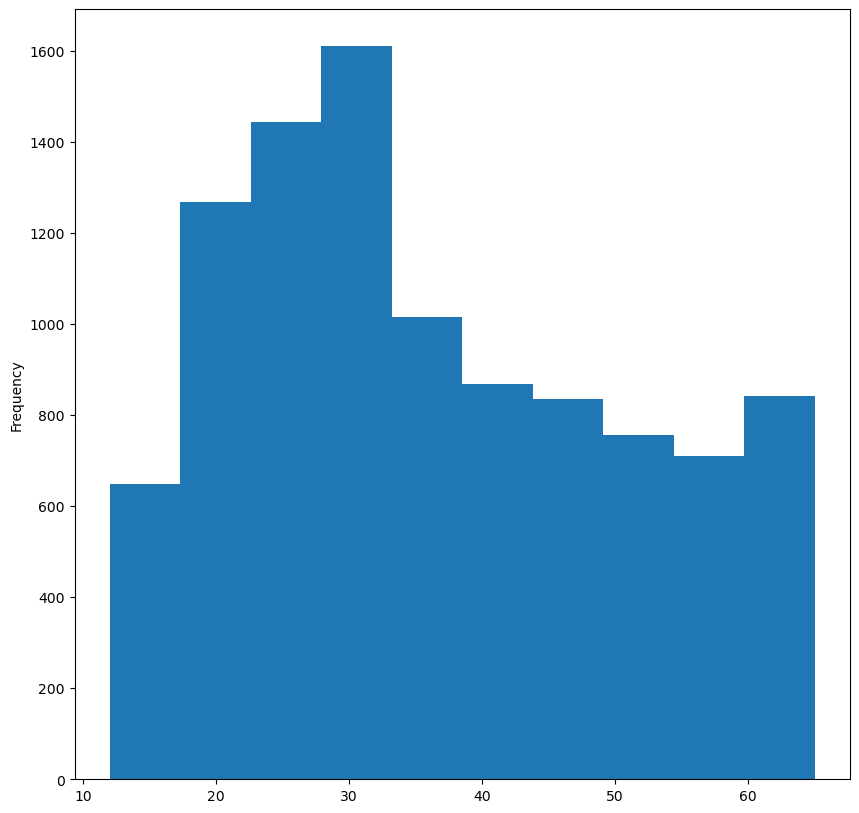

In [7]:
consumidores['per_edad'].plot.hist();

Alternativamente, podemos hacer un gráfico KDE , o Kernel Density Estimate, que produce una funcion estimada de la distribución de la variable ([Función de densidad de probabilidad](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_densidad_de_probabilidad)).

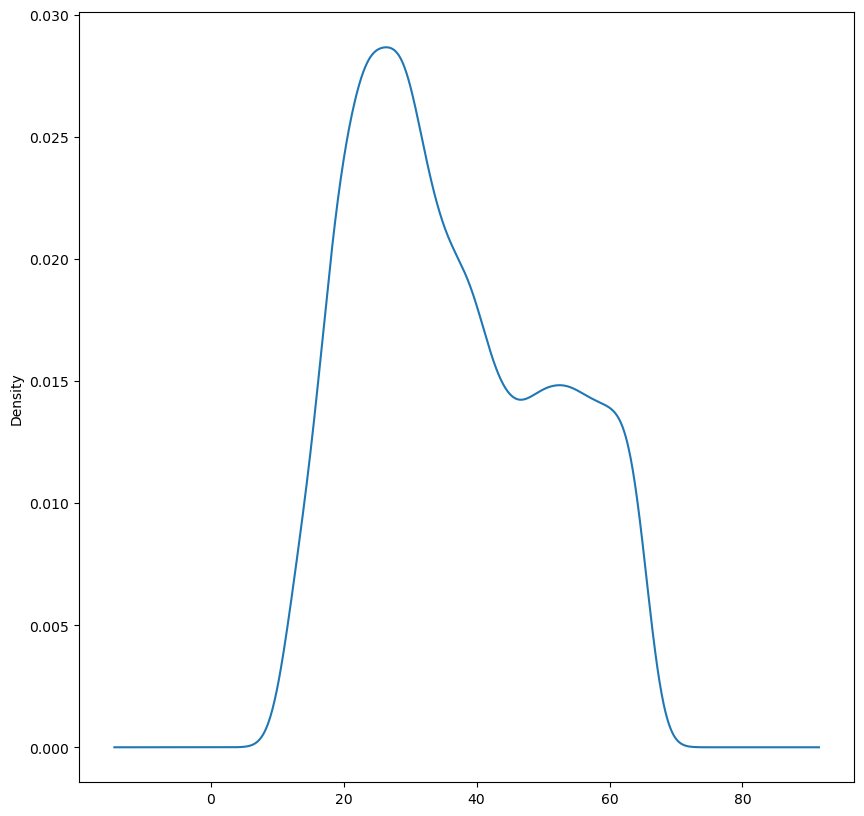

In [8]:
consumidores['per_edad'].plot.kde();

In [9]:
def distribucion_variable_numerica(df, col):
    df[col].plot.kde()
    plt.xlabel('Distribucion de la variable {}'.format(col))
    plt.show()

Ahora podemos usar `pywidgets` para poder analizar las distribuciones más cómodamente. Tiene sentido hacer estos gráficos solo para variables numéricas. El método `pandas.select_dtypes` devuelve aquellas columnas de unos tipos específicos

In [10]:
columnas_numericas = consumidores.select_dtypes(['int', 'float']).columns

In [14]:
!conda install --yes --prefix {sys.prefix} ipywidgets

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Danny\.conda\envs\data

  added / updated specs:
    - ipywidgets


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ipywidgets-8.0.6           |     pyhd8ed1ab_0         110 KB  conda-forge
    jupyterlab_widgets-3.0.7   |     pyhd8ed1ab_1         169 KB  conda-forge
    widgetsnbextension-4.0.7   |     pyhd8ed1ab_0         828 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following NEW packages will be INSTALLED:

  ipywidgets         conda-forge/noarch::ipywidgets-8.0.6-pyhd8ed1ab_0 
  jupyterlab_widgets conda-forge/noarch::jupyterlab_widgets-3.0.7-pyhd8ed1ab_1 
  widgetsnbextension conda-forge/noarch::widgetsnbextension-4.0.7-pyhd8ed1ab_0 




widgetsnbextension-4 | 828 KB    |            



==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0




In [11]:
from ipywidgets import interact, fixed

In [12]:
interact(distribucion_variable_numerica, col=columnas_numericas, df=fixed(vehiculos));

interactive(children=(Dropdown(description='col', options=('directorio', 'per_sexo', 'per_edad', 'vive_padre_h…

Vemos que la variable `cilindros` pese a ser numérica no tiene una distribución equilibrada de valores

In [35]:
vehiculos['cilindros'].value_counts(normalize=True)

4.0     0.381184
6.0     0.350767
8.0     0.220344
5.0     0.020115
12.0    0.015630
3.0     0.006252
10.0    0.004132
2.0     0.001359
16.0    0.000217
Name: cilindros, dtype: float64

In [ ]:
../../../media/dnormal.png

Parece que gran parte de las variables siguen una distribucion normal. Que las variables sigan una distribución normal es importante dado que muchos algoritmos asumen que la distribución de las variables es normal.

La distribucion normal tiene esta forma:

![dnormal](../../../media/dnormal.png)

Podemos comprobar esto con un [grafico de probabilidad](http://www.itl.nist.gov/div898/handbook/eda/section3/probplot.htm).

La funcion de scipy.stats `probplot` compara la distribucion de una variable con una distribucion teorica (la normal por defecto), cuanto más se parezca la gráfica a una linea de 45 grados más normal será.

In [17]:
from scipy import stats

In [38]:
def normalidad_variable_numerica(col):
    stats.probplot(vehiculos[col], plot=plt)
    plt.xlabel('Diagrama de Probabilidad(normal) de la variable {}'.format(col))
    plt.show()

In [39]:
interact(normalidad_variable_numerica, col=columnas_numericas);

interactive(children=(Dropdown(description='col', options=('year', 'desplazamiento', 'cilindros', 'consumo', '…

Parece que siguen una distribución normal, no obstante, conviene asegurarse haciendo un test de normalidad. En un test de normalidad, lo que queremos es rechazar la hipótesis nula de que la variable a analizar se ha obtenido de una población que sigue una distribución normal. Para un nivel de confianza de 95%, rechazamos la hipótesis nula si el p-value es inferior a 0.05. Esto es, si se obtiene un valor P (p-value) menor de 0.05, significa que las probabilidades de que la hipótesis nula sean ciertas es tan baja (menos de un 5%) que la rechazamos.


scipy tiene la función [normaltest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html) que devuelve el p-value

In [19]:
for num_col in columnas_numericas:
    _, pval = stats.normaltest(vehiculos[num_col])
    if(pval >= 0.05):
        print("Columna {} si sigue una distribución normal".format(num_col))

Con lo cual vemos que ninguna de las variables numéricas siguen una distribución normal correcta.

### Distribución variables categóricas

Una manera de ver como se distribuyen las variables categóricas es mediante la función `pandas.value_counts`. Dicha función nos devuelve el numero de records existentes para cada valor de una columna

In [13]:
def distribucion_variable_categorica(col):
    consumidores[col].value_counts(ascending=True,normalize=True).tail(20).plot.barh()
    plt.show()

In [20]:
columnas_categoricas = consumidores.select_dtypes(['object', 'category','int64','float64']).columns

In [21]:
interact(distribucion_variable_categorica, col=columnas_categoricas);

interactive(children=(Dropdown(description='col', options=('directorio', 'per_sexo', 'per_edad', 'vive_padre_h…

### Conclusiones

- Ninguna variable numérica sigue una distribución normal